In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import math as mt

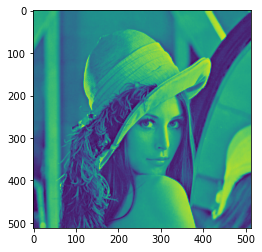

In [11]:
path = 'D:/4.1/Course/Theory/CSE 4127 (Image Processing)/Previous/CSE 4127 Image/Image Lab/lab1/lab1/lena.png'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

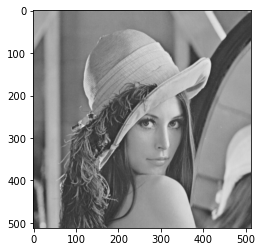

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-110.  -53. -260. ... -120. -112. -119.]
 [-126.  -69. -376. ... -183. -170. -163.]
 [-282. -185.    8. ... -221. -239. -249.]
 ...
 [-114.  -67. -229. ...  -90. -115. -138.]
 [-117.  -66. -249. ... -101. -114. -128.]
 [-114.  -61. -276. ... -137. -112. -117.]]


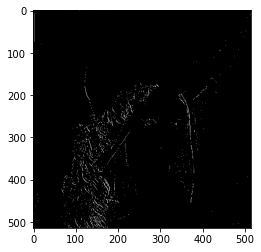

In [89]:
##Eita oder code


path = 'D:/4.1/Course/Theory/CSE 4127 (Image Processing)/Previous/CSE 4127 Image/Image Lab/lab1/lab1/lena.png'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #cv2.imread(path, 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #cause matplotlib always expects the image to be having three channels
plt.show()

kernel = np.array(([0,-1,0],
                   [-1,5,-5],
                   [0,-1,2]), np.float32)

#print(kernel.size)
# kernel_size = kernel.size
x = mt.sqrt(kernel.size)
# print(x)
kernel_size = int(x)
pad = kernel_size//2
pad = int(pad)
borderedImage = cv2.copyMakeBorder(img, pad,pad,pad,pad,cv2.BORDER_REPLICATE)
im_H = borderedImage.shape[0]
im_W = borderedImage.shape[1]
#print(im_H,im_W)
result1 = np.zeros((im_H, im_W), dtype="float32")

for x in range(im_H):
  for y in range(im_W):
    for i in range(kernel_size):
      for j in range(kernel_size):
        result1[x][y] += borderedImage[x-i-1][y-j-1] * kernel[i, j]

print(result1) #2D matrix


plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.show()

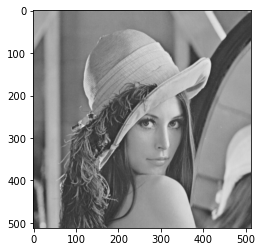

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-169. -166. -166. ... -139. -103. -162.]
 [-169. -166. -166. ... -139. -103. -162.]
 [-169. -166. -166. ... -139. -103. -162.]
 ...
 [ -56.  -64.  -54. ...  -94. -108.  -99.]
 [ -53.  -86.  -39. ... -116. -123. -110.]
 [ -53.  -86.  -44. ... -118. -129. -118.]]
(512, 512)


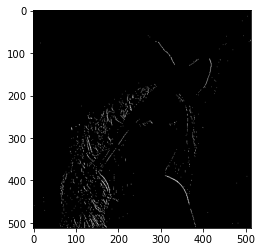

In [98]:
##Using correlation


path = 'D:/4.1/Course/Theory/CSE 4127 (Image Processing)/Previous/CSE 4127 Image/Image Lab/lab1/lab1/lena.png'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #cv2.imread(path, 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #cause matplotlib always expects the image to be having three channels
plt.show()

# kernel = np.array(([0,-1,0],
#                    [-1,5,-5],
#                    [0,-1,2]), np.float32)
kernel = np.array(([0,-1,0],
                   [-1,5,-5],
                   [0,-1,2]), np.float32)



x = mt.sqrt(kernel.size)
# print(x)
kernel_size = int(x)
pad = kernel_size//2
pad = int(pad)
borderedImage = cv2.copyMakeBorder(img, pad,pad,pad,pad,cv2.BORDER_REPLICATE)
im_H = borderedImage.shape[0]
im_W = borderedImage.shape[1]
#print(im_H,im_W)
result = np.zeros((512, 512), dtype="float32")

# for x in range(1..im_H):
#   for y in range(1..im_W):
#     for i in range(kernel_size):
#       for j in range(kernel_size):
#         result[x][y] += borderedImage[x-i-1][y-j-1] * kernel[i, j]

for x in range (1, 513):
    for y in range (1, 513):
        for i in range(3):
            for j in range(3):
                result[x - 1][y - 1] += borderedImage[x + i - 1][y + j - 1] * kernel[i][j]
                


print(result) #2D matrix
print(result.shape)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

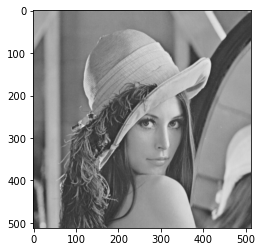

[[ 2. -1.  0.]
 [-5.  5. -1.]
 [ 0. -1.  0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-169. -168. -170. ... -171. -177. -210.]
 [-169. -168. -170. ... -171. -177. -210.]
 [-169. -168. -170. ... -171. -177. -210.]
 ...
 [ -50.  -56.  -40. ... -114. -128. -117.]
 [ -53.  -64.  -23. ... -112. -117. -114.]
 [ -53.  -64.  -28. ... -112. -119. -110.]]
(512, 512)


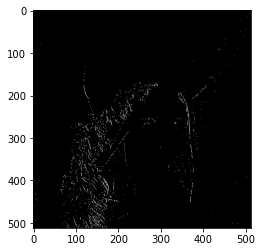

In [102]:
##Using flip Convolution


path = 'D:/4.1/Course/Theory/CSE 4127 (Image Processing)/Previous/CSE 4127 Image/Image Lab/lab1/lab1/lena.png'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #cv2.imread(path, 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #cause matplotlib always expects the image to be having three channels
plt.show()

# kernel = np.array(([0,-1,0],
#                    [-1,5,-5],
#                    [0,-1,2]), np.float32)
kernel = np.array(([0,-1,0],
                   [-1,5,-5],
                   [0,-1,2]), np.float32)

k = np.flip(kernel, 0)
k = np.flip(k, 1)
print(k)
#print(kernel.size)
# kernel_size = kernel.size
x = mt.sqrt(kernel.size)
# print(x)
kernel_size = int(x)
pad = kernel_size//2
pad = int(pad)
borderedImage = cv2.copyMakeBorder(img, pad,pad,pad,pad,cv2.BORDER_REPLICATE)
im_H = borderedImage.shape[0]
im_W = borderedImage.shape[1]
#print(im_H,im_W)
result = np.zeros((512, 512), dtype="float32")

# for x in range(1..im_H):
#   for y in range(1..im_W):
#     for i in range(kernel_size):
#       for j in range(kernel_size):
#         result[x][y] += borderedImage[x-i-1][y-j-1] * kernel[i, j]

for x in range (1, 513):
    for y in range (1, 513):
        for i in range(3):
            for j in range(3):
                result[x - 1][y - 1] += borderedImage[x + i - 1][y + j - 1] * k[i][j]
                


print(result) #2D matrix
print(result.shape)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

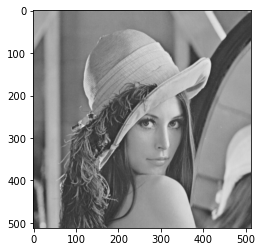

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-169. -168. -170. ... -171. -177. -210.]
 [-169. -168. -170. ... -171. -177. -210.]
 [-169. -168. -170. ... -171. -177. -210.]
 ...
 [ -50.  -56.  -40. ... -114. -128. -117.]
 [ -53.  -64.  -23. ... -112. -117. -114.]
 [ -53.  -64.  -28. ... -112. -119. -110.]]
(512, 512)


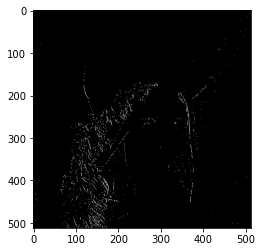

In [103]:
##Not Using flip


path = 'D:/4.1/Course/Theory/CSE 4127 (Image Processing)/Previous/CSE 4127 Image/Image Lab/lab1/lab1/lena.png'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #cv2.imread(path, 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #cause matplotlib always expects the image to be having three channels
plt.show()

# kernel = np.array(([0,-1,0],
#                    [-1,5,-5],
#                    [0,-1,2]), np.float32)
kernel = np.array(([0,-1,0],
                   [-1,5,-5],
                   [0,-1,2]), np.float32)
# k = np.zeros(())

# k = np.flip(kernel, 0)
# k = np.flip(k, 1)
# print(k)
#print(kernel.size)
# kernel_size = kernel.size
x = mt.sqrt(kernel.size)
# print(x)
kernel_size = int(x)
pad = kernel_size//2
pad = int(pad)
borderedImage = cv2.copyMakeBorder(img, pad,pad,pad,pad,cv2.BORDER_REPLICATE)
im_H = borderedImage.shape[0]
im_W = borderedImage.shape[1]
#print(im_H,im_W)
result4 = np.zeros((512, 512), dtype="float32")

# for x in range(1..im_H):
#   for y in range(1..im_W):
#     for i in range(kernel_size):
#       for j in range(kernel_size):
#         result[x][y] += borderedImage[x-i-1][y-j-1] * kernel[i, j]

for x in range (1, 513):
    for y in range (1, 513):
        for i in range(3):
            for j in range(3):
                result4[x - 1][y - 1] += borderedImage[x + i - 1][y + j - 1] * kernel[2-i][2-j]
                


print(result4) #2D matrix
print(result4.shape)

plt.imshow(cv2.cvtColor(result4, cv2.COLOR_BGR2RGB))
plt.show()

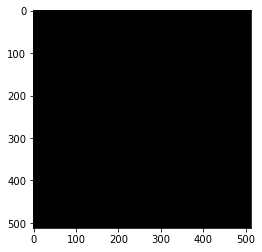

In [104]:
img2 = cv2.subtract(result,result4)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

The images are completely Equal


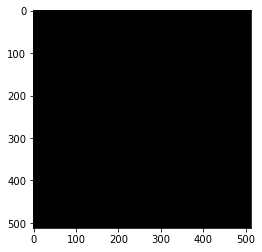

In [105]:
b, g, r = cv2.split(img2)
if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))    